# Social Network Analysis

### Libraries

In [9]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import json
import networkx as nx
from networkx.algorithms.community import girvan_newman
import community.community_louvain as louvain

In [2]:
# major variables

city = 'Sicklerville'

### Helper methods

In [3]:
def generate_graph(nodes, edges):
    '''
    Generate a networkx graph from nodes and edges dataframes
    '''
    G = nx.Graph()
    for _, row in nodes.iterrows():
        G.add_node(row['id'], name=row['name'])
    for _, row in edges.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['weight'], type=row['type'])
    return G

In [4]:
def generate_communities(G, algorithm='girvan_newman'):
    '''
    Generate communities using the specified algorithm
    '''
    if algorithm == 'girvan_newman':
        communities = girvan_newman(G)
        first_iteration_communities = next(communities)
        return first_iteration_communities
    elif algorithm == 'louvain':
        communities = louvain.best_partition(G)
        return communities
    else:
        raise ValueError("Invalid algorithm. Choose 'girvan_newman' or 'louvain'.")

In [5]:
def visualize_graph(G, communities, city, connection):
    '''
    Visualize the graph with nodes colored by community
    '''
    plt.figure(figsize=(12, 5))
    pos = nx.spring_layout(G)
    
    community_colors = {}
    if isinstance(communities, tuple):
        for i, comm_nodes in enumerate(communities):
            for node in comm_nodes:
                community_colors[node] = i
    elif isinstance(communities, dict):
        for node, community_id in communities.items():
            community_colors[node] = community_id
    node_colors = [community_colors[node] for node in G.nodes()]
    
    nx.draw(G, pos,
            node_color=node_colors,
            cmap=plt.cm.tab20,
            node_size=20,
            edge_color='black',
            edgecolors='black',
            width=1,
            with_labels=False)
    
    plt.title(f"{city} - {connection}")
    plt.show()

In [19]:
def store_communities(communities, num_communities=None, filename='communities.json'):
    '''
    Store communities in a JSON file
    '''
    community_data = {"num_communities": num_communities, "communities": []}
    if isinstance(communities, tuple):
        for community_set in communities:
            community_data["communities"].append(list(community_set))
    elif isinstance(communities, dict):
        data = {}
        for node, community_id in communities.items():
            if community_id not in data:
                data[community_id] = []
            data[community_id].append(node)
        for _, nodes in sorted(data.items()):
            community_data["communities"].append(nodes)
    
    else:
        raise ValueError("Unsupported community format. Please provide a tuple of sets or a dictionary.")
    if num_communities is None:
        community_data["num_communities"] = len(community_data["communities"])
    
    with open(filename, 'w') as f:
        json.dump(community_data, f, indent=4)
    print(f"Communities have been stored in {filename}.")

### Friendship connections

In [29]:
# load friendship data

connection = 'friendships'

nodes = pd.read_csv(f'nodes_and_edges/{city}_{connection}_nodes.csv')
edges = pd.read_csv(f'nodes_and_edges/{city}_{connection}_edges.csv')

In [30]:
# generate friendship graph

friendship_graph = generate_graph(nodes, edges)

In [31]:
# generate friendship communities

friendship_communities = generate_communities(friendship_graph, algorithm='girvan_newman')
num_communities = len(friendship_communities)

store_communities(friendship_communities, num_communities, filename=f'communities/{city}_{connection}_communities.json')

Communities have been stored in communities/Sicklerville_friendships_communities.json.


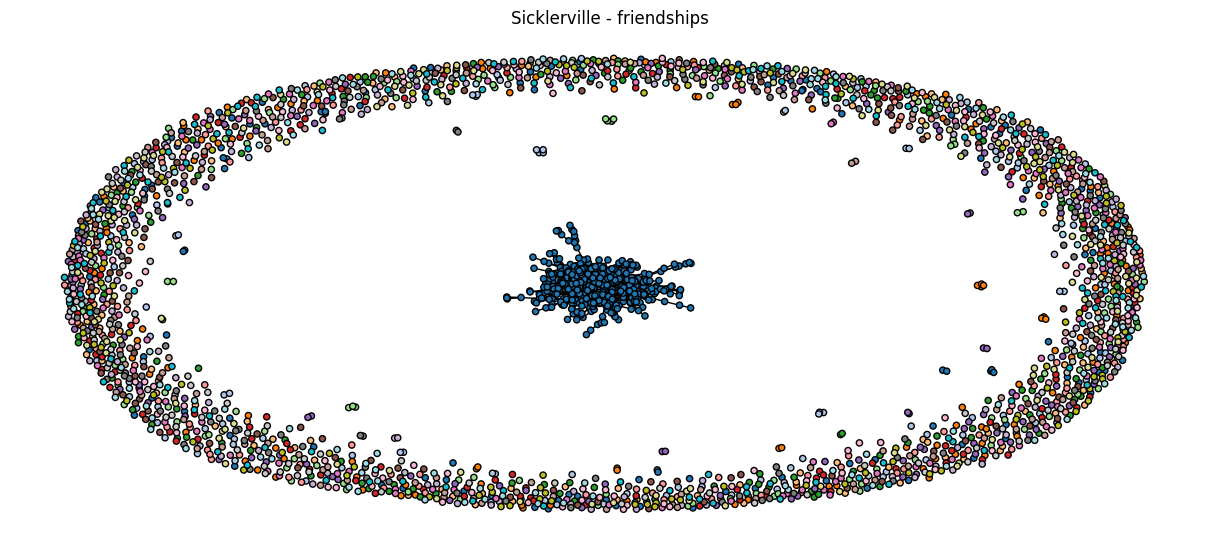

In [9]:
# visualize friendship graph

visualize_graph(friendship_graph, friendship_communities, city, connection)

### Review connections

In [32]:
# load review data

connection = 'business_reviews'

nodes = pd.read_csv(f'nodes_and_edges/{city}_{connection}_nodes.csv')
edges = pd.read_csv(f'nodes_and_edges/{city}_{connection}_edges.csv')

In [7]:
# generate review graph

review_graph = generate_graph(nodes, edges)

In [33]:
# generate review communities

review_communities = generate_communities(review_graph, algorithm='louvain') # girvan_newman is incredibly slow here
num_communities = len(set(review_communities.values()))

store_communities(review_communities, num_communities, filename=f'communities/{city}_{connection}_communities.json')

Communities have been stored in communities/Sicklerville_business_reviews_communities.json.


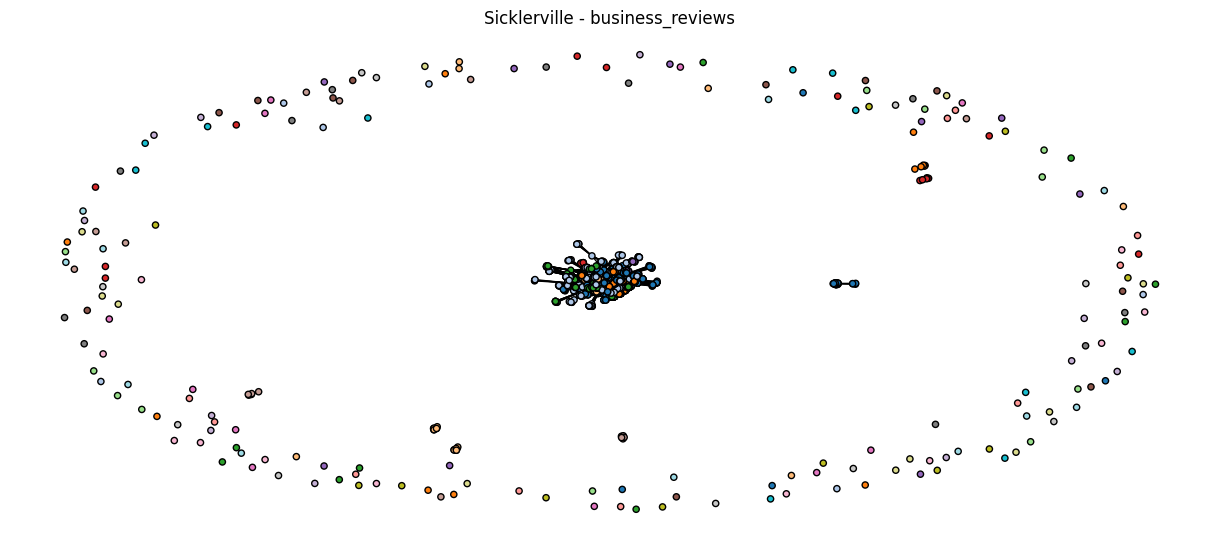

In [12]:
# visualize review graph

visualize_graph(review_graph, review_communities, city, connection)

### Tip connections

In [34]:
# load tip data

connection = 'business_tips'

nodes = pd.read_csv(f'nodes_and_edges/{city}_{connection}_nodes.csv')
edges = pd.read_csv(f'nodes_and_edges/{city}_{connection}_edges.csv')

In [36]:
# generate tip graph

tip_graph = generate_graph(nodes, edges)

In [37]:
# generate tip communities

tip_communities = generate_communities(tip_graph, algorithm='girvan_newman')
num_communities = len(tip_communities)

store_communities(tip_communities, num_communities, filename=f'communities/{city}_{connection}_communities.json')

Communities have been stored in communities/Sicklerville_business_tips_communities.json.


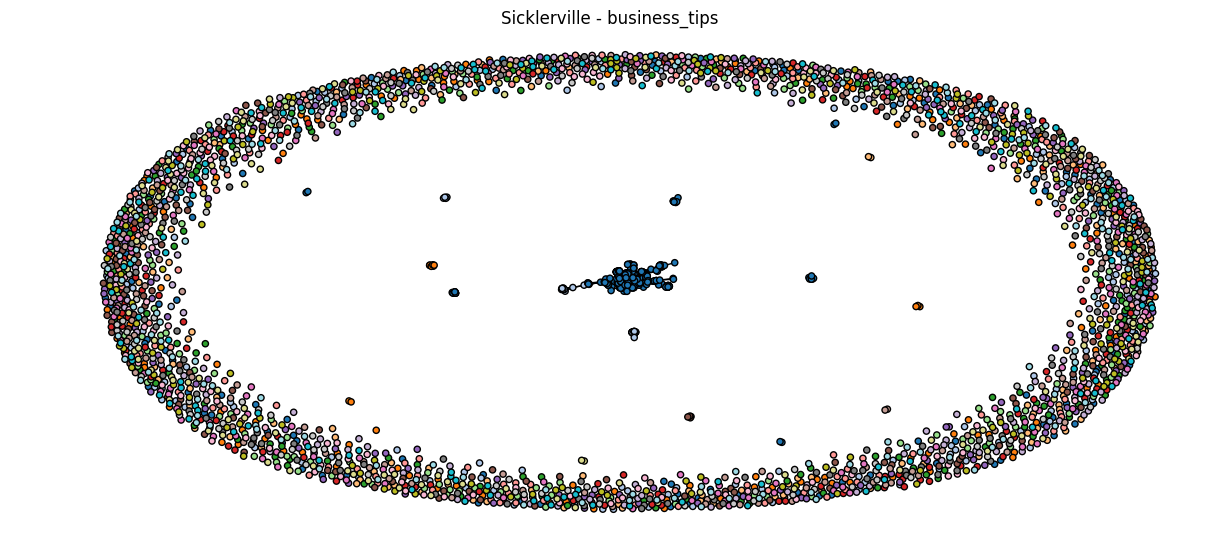

In [17]:
# visualize tip graph

visualize_graph(tip_graph, tip_communities, city, connection)

### Category connections

In [38]:
# load category data

connection = 'categories'

nodes = pd.read_csv(f'nodes_and_edges/{city}_{connection}_nodes.csv')
edges = pd.read_csv(f'nodes_and_edges/{city}_{connection}_edges.csv')

In [39]:
# generate category graph

category_graph = generate_graph(nodes, edges)

In [40]:
# generate category communities

category_communities = generate_communities(category_graph, algorithm='louvain')
num_communities = len(set(category_communities.values()))

store_communities(category_communities, num_communities, filename=f'communities/{city}_{connection}_communities.json')

Communities have been stored in communities/Sicklerville_categories_communities.json.


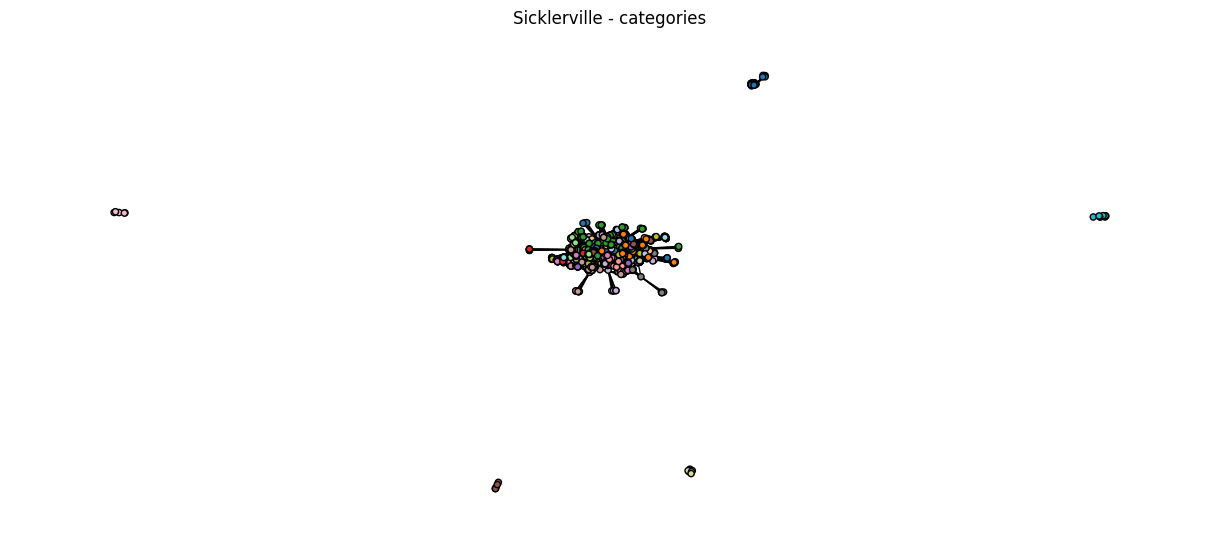

In [21]:
# visualize category graph

visualize_graph(category_graph, category_communities, city, connection)

### Combined connections

In [41]:
# load combined data

connection = 'combined'

nodes = pd.read_csv(f'nodes_and_edges/{city}_{connection}_nodes.csv')
edges = pd.read_csv(f'nodes_and_edges/{city}_{connection}_edges.csv')

In [42]:
# generate combined graph

combined_graph = generate_graph(nodes, edges)

In [43]:
# generate combined communities

combined_communities = generate_communities(combined_graph, algorithm='louvain')
num_communities = len(set(combined_communities.values()))

store_communities(combined_communities, num_communities, filename=f'communities/{city}_{connection}_communities.json')

Communities have been stored in communities/Sicklerville_combined_communities.json.


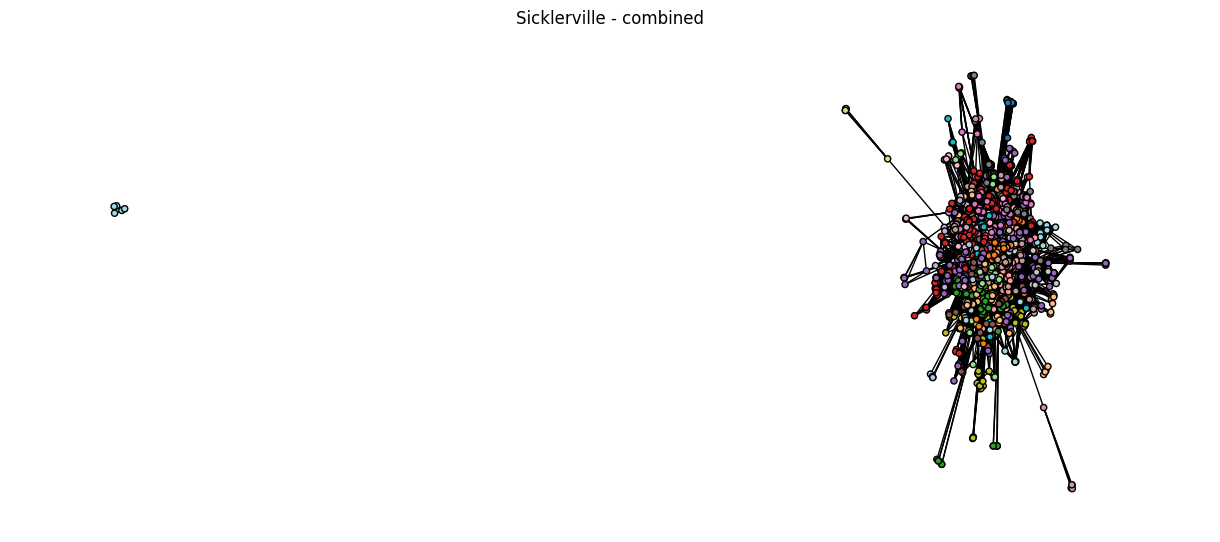

In [25]:
# visualize combined graph

visualize_graph(combined_graph, combined_communities, city, connection)

### Graph statistics

In [26]:
# graph density

edge_density = nx.density(combined_graph)
print(f"Density: {edge_density:0.4f}")

Density: 0.0371


In [27]:
# graph diameter

is_connected = nx.is_connected(combined_graph)
if is_connected:
    diameter_weighted = nx.diameter(combined_graph, weight='weight')
    print(f"Weighted undirected diameter: {diameter_weighted}")
else:
    print("The graph is not connected.")


The graph is not connected.


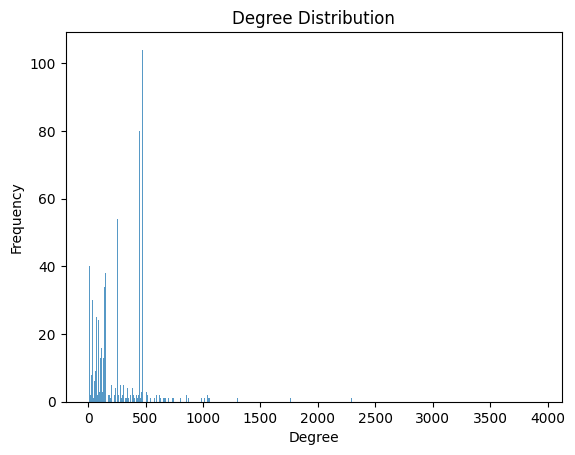

In [28]:
# graph degree distribution

degrees = dict(nx.degree(combined_graph, weight='weight'))

plt.hist(degrees.values(), bins=range(1, max(degrees.values()) + 2), alpha=0.75)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [ ]:
# closeness centrality

closeness = nx.closeness_centrality(combined_graph, distance='weight')

closeness_df = pd.DataFrame({'name': list(closeness.keys()), 'closeness': list(closeness.values())})
closeness_df = closeness_df.sort_values(by='closeness', ascending=False)

closeness_df

# taking too long to compute (when considering weights)

In [30]:
# betweenness centrality

betweenness = nx.betweenness_centrality(combined_graph, k=500, weight='weight')

betweenness_df = pd.DataFrame({'name': list(betweenness.keys()), 'betweenness': list(betweenness.values())})
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)

betweenness_df

# running with a representative sample so it doesn't take forever

name  betweenness
367   ePxjx8tee06mn5h87X-Sxg     0.046682
84    178lUNiULUgxi8fdm1zXmA     0.042248
1141  NRn5ddCUt1QgnPnRnTgK2Q     0.039958
2988  eou_N8D5TBvS3d9-tgNf2g     0.033686
337   6Q8dQGr_DBKcmQ1aXVWvTQ     0.033542
...                      ...          ...
2219  33kT5T_g9Gpuxrn7xhvxWA     0.000000
2221  Don38MeRTHtj8XJLMeYnvQ     0.000000
2222  p9gpDqODX6u0CoBGmtAlow     0.000000
831   G_a9M9WnQWrvYST6zX9RlQ     0.000000
3077  AUaVo2JAMwLGJmBo3M4VyQ     0.000000

[3078 rows x 2 columns]

In [31]:
# edge betweenness centrality

edge_betweenness = nx.edge_betweenness_centrality(combined_graph, k=500, weight='weight')

edge_betweenness

# running with a representative sample so it doesn't take forever

{('RgDVC3ZUBqpEe6Y1kPhIpw', '-XZOz3ViFET3IZFRGFoOpQ'): 8.128065182386265e-06,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', '1C5kFjSPdf9P74IhPy6e-w'): 3.9686674901459114e-07,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', '1n3IENFR9dpPztzTh0A6dA'): 3.5953692610253577e-06,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', '3Qqi2SFrqZDmzb_txv3yaQ'): 2.4070395985937266e-05,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', '4TE2IPdI9_4dYAalTGImUg'): 3.5953692610253577e-06,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', '8DGc1UEegk6SBGV39OJtQA'): 3.5953692610253577e-06,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', '9C_h-H1Z7Xz7dvbgsBrnSg'): 3.992792133884211e-06,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', 'A_BF2dDDUTKGVXrqxO9mag'): 2.0983427879678967e-06,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', 'ApJ9YgYU-AhS4a-F5oTGHw'): 7.1149298771161326e-06,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', 'B-s-8VUnuBjGTP3d01jsyw'): 2.6729615287643e-06,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', 'ET8n-r7glWYqZhuR6GcdNw'): 7.730866416432555e-07,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', 'FV6QtuA5P52Cm5q7SOeMLQ'): 3.5953692610253577e-06,
 ('RgDVC3ZUBqpEe6Y1kPhIpw', 'JSpwp4pAp_Hu4xmPuNitBA'): 2.4

In [ ]:
# average shortest path length

if nx.is_connected(combined_graph):
    mean_dist = nx.average_shortest_path_length(combined_graph, weight='weight')
    print(f"Average path length: {mean_dist:.3f}")
else:
    connected_components = nx.connected_components(combined_graph)
    for component in connected_components:
        component_graph = combined_graph.subgraph(component)
        avg_path_length = nx.average_shortest_path_length(component_graph, weight='weight')
        print(f"Component: {component}, Average shortest path length: {avg_path_length:.3f}")

# taking too long to compute

In [32]:
# graph homophily

homophily = nx.degree_assortativity_coefficient(combined_graph, weight='weight')

print(f"All network = {homophily:.3f}")

All network = -0.008
